<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [3]:
# Import necessary libraries

import torch
from torch import nn
import matplotlib.pyplot as plt



In [4]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"



## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


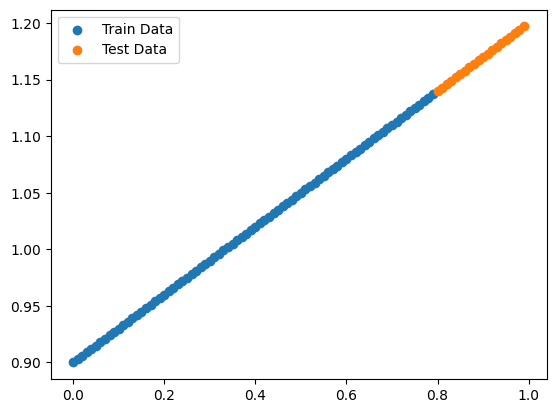

In [5]:
weight = 0.3
bias = 0.9
X = torch.arange(0, 1, 0.01).unsqueeze(1)
y = weight * X + bias

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.legend()
plt.show()


## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))
    def forward(self, x):
        return self.weight * x + self.bias

model = LinearRegressionModel().to(device)
print(model.state_dict())


OrderedDict({'weight': tensor([-0.1222], device='cuda:0'), 'bias': tensor([-0.0206], device='cuda:0')})


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [7]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 300

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_fn(test_pred, y_test)
        print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")


Epoch: 0 | Train loss: 1.087 | Test loss: 1.285
Epoch: 20 | Train loss: 0.856 | Test loss: 1.014
Epoch: 40 | Train loss: 0.625 | Test loss: 0.744
Epoch: 60 | Train loss: 0.394 | Test loss: 0.473
Epoch: 80 | Train loss: 0.163 | Test loss: 0.202
Epoch: 100 | Train loss: 0.008 | Test loss: 0.018
Epoch: 120 | Train loss: 0.001 | Test loss: 0.002
Epoch: 140 | Train loss: 0.008 | Test loss: 0.002
Epoch: 160 | Train loss: 0.008 | Test loss: 0.002
Epoch: 180 | Train loss: 0.008 | Test loss: 0.002
Epoch: 200 | Train loss: 0.008 | Test loss: 0.002
Epoch: 220 | Train loss: 0.008 | Test loss: 0.002
Epoch: 240 | Train loss: 0.008 | Test loss: 0.002
Epoch: 260 | Train loss: 0.008 | Test loss: 0.002
Epoch: 280 | Train loss: 0.008 | Test loss: 0.002


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

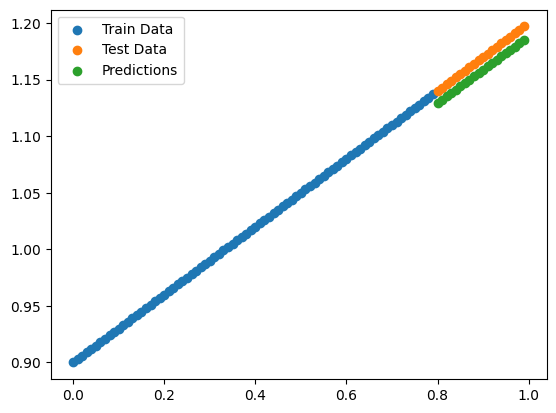

In [8]:
model.eval()
with torch.inference_mode():
    y_preds = model(X_test).cpu()

plt.scatter(X_train.cpu(), y_train.cpu(), label="Train Data")
plt.scatter(X_test.cpu(), y_test.cpu(), label="Test Data")
plt.scatter(X_test.cpu(), y_preds, label="Predictions")
plt.legend()
plt.show()


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [9]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(model.state_dict(), MODEL_SAVE_PATH)

loaded_model = LinearRegressionModel().to(device)
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.eval()

with torch.inference_mode():
    loaded_preds = loaded_model(X_test).cpu()

print(torch.allclose(y_preds, loaded_preds))


True
